In [1]:
import pandas as pd

In [2]:
from glob import glob

In [7]:
stations_files = glob('C:/python/지역*.xls')
stations_files

['C:/python\\지역_위치별(주유소)_1.xls',
 'C:/python\\지역_위치별(주유소)_10.xls',
 'C:/python\\지역_위치별(주유소)_11.xls',
 'C:/python\\지역_위치별(주유소)_12.xls',
 'C:/python\\지역_위치별(주유소)_13.xls',
 'C:/python\\지역_위치별(주유소)_14.xls',
 'C:/python\\지역_위치별(주유소)_15.xls',
 'C:/python\\지역_위치별(주유소)_16.xls',
 'C:/python\\지역_위치별(주유소)_17.xls',
 'C:/python\\지역_위치별(주유소)_18.xls',
 'C:/python\\지역_위치별(주유소)_19.xls',
 'C:/python\\지역_위치별(주유소)_2.xls',
 'C:/python\\지역_위치별(주유소)_20.xls',
 'C:/python\\지역_위치별(주유소)_21.xls',
 'C:/python\\지역_위치별(주유소)_22.xls',
 'C:/python\\지역_위치별(주유소)_23.xls',
 'C:/python\\지역_위치별(주유소)_24.xls',
 'C:/python\\지역_위치별(주유소)_25.xls',
 'C:/python\\지역_위치별(주유소)_3.xls',
 'C:/python\\지역_위치별(주유소)_4.xls',
 'C:/python\\지역_위치별(주유소)_5.xls',
 'C:/python\\지역_위치별(주유소)_6.xls',
 'C:/python\\지역_위치별(주유소)_7.xls',
 'C:/python\\지역_위치별(주유소)_8.xls',
 'C:/python\\지역_위치별(주유소)_9.xls']

In [8]:
tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)

In [9]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      521 non-null    object
 1   상호      521 non-null    object
 2   주소      521 non-null    object
 3   상표      521 non-null    object
 4   전화번호    521 non-null    object
 5   셀프여부    521 non-null    object
 6   고급휘발유   521 non-null    object
 7   휘발유     521 non-null    object
 8   경유      521 non-null    object
 9   실내등유    521 non-null    object
dtypes: object(10)
memory usage: 44.8+ KB


In [10]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1648,1429,-
1,서울특별시,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),현대오일뱅크,02-529-5101,Y,1782,1658,1458,-
2,서울특별시,은마주유소,서울특별시 강남구 영동대로 235 (대치동) 은마주유소,GS칼텍스,02-3452-1882,N,1809,1659,1458,-
3,서울특별시,(주)한진 도곡주유소,서울특별시 강남구 도곡로 162 (도곡동),S-OIL,02-2058-3024,N,-,1660,1460,-
4,서울특별시,SK서광주유소,서울 강남구 역삼로 142 (역삼동),SK에너지,02-562-4855,Y,1875,1665,1475,1050


In [11]:
stations = pd.DataFrame({'Oil_store' : station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1648,Y,SK에너지
1,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),1658,Y,현대오일뱅크
2,은마주유소,서울특별시 강남구 영동대로 235 (대치동) 은마주유소,1659,N,GS칼텍스
3,(주)한진 도곡주유소,서울특별시 강남구 도곡로 162 (도곡동),1660,N,S-OIL
4,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1665,Y,SK에너지


In [12]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1648,Y,SK에너지,강남구
1,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),1658,Y,현대오일뱅크,강남구
2,은마주유소,서울특별시 강남구 영동대로 235 (대치동) 은마주유소,1659,N,GS칼텍스,강남구
3,(주)한진 도곡주유소,서울특별시 강남구 도곡로 162 (도곡동),1660,N,S-OIL,강남구
4,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1665,Y,SK에너지,강남구


In [13]:
stations['구'].unique()

array(['강남구', '도봉구', '특별시', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '서울특별시', '성북구', '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구',
       '중구', '중랑구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'],
      dtype=object)

In [14]:
stations[stations['구']=='서울특별시']

,Oil_store,주소,가격,셀프,상표,구
14,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),1797,N,SK에너지,서울특별시


In [15]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강남구', '도봉구', '특별시', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구',
       '성북구', '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'],
      dtype=object)

In [17]:
stations[stations['구']=='특별시']

,Oil_store,주소,가격,셀프,상표,구
10,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1614,Y,S-OIL,특별시


In [18]:
stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [19]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
13,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
25,현대주유소,서울 양천구 남부순환로 372 (신월동),-,Y,S-OIL,양천구
17,명진석유(주)동서울주유소,서울특별시 강동구 천호대로 1456 (상일동),-,Y,GS칼텍스,강동구
33,하나주유소,서울특별시 영등포구 도림로 236 (신길동),-,N,S-OIL,영등포구
34,대지주유소,서울 영등포구 영등포로 115 (당산동2가),-,N,SK에너지,영등포구
17,유성주유소(self),서울 중랑구 망우로 436 (망우동),-,Y,현대오일뱅크,중랑구
12,새한주유소,서울특별시 강북구 도봉로 75 (미아동),-,Y,SK에너지,강북구
34,하이웨이주유소,서울 강서구 공항대로 432 (화곡동),-,N,S-OIL,강서구
20,삼한주유소,서울특별시 구로구 부일로 871 (온수동),-,N,S-OIL,구로구
21,현대오일뱅크(주)직영신구로주유소,서울특별시 구로구 가마산로 293 (구로동),-,N,현대오일뱅크,구로구


In [20]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),1648,Y,SK에너지,강남구
1,현대오일뱅크㈜ 직영 도곡셀프주유소,서울특별시 강남구 남부순환로 2718 (도곡동),1658,Y,현대오일뱅크,강남구
2,은마주유소,서울특별시 강남구 영동대로 235 (대치동) 은마주유소,1659,N,GS칼텍스,강남구
3,(주)한진 도곡주유소,서울특별시 강남구 도곡로 162 (도곡동),1660,N,S-OIL,강남구
4,SK서광주유소,서울 강남구 역삼로 142 (역삼동),1665,Y,SK에너지,강남구


In [21]:
stations['가격']=[float(value) for value in stations['가격']]

In [30]:
stations.reset_index(inplace=True)
del stations['index']

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
import platform
from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~')

In [23]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  511 non-null    object 
 1   주소         511 non-null    object 
 2   가격         511 non-null    float64
 3   셀프         511 non-null    object 
 4   상표         511 non-null    object 
 5   구          511 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.1+ KB


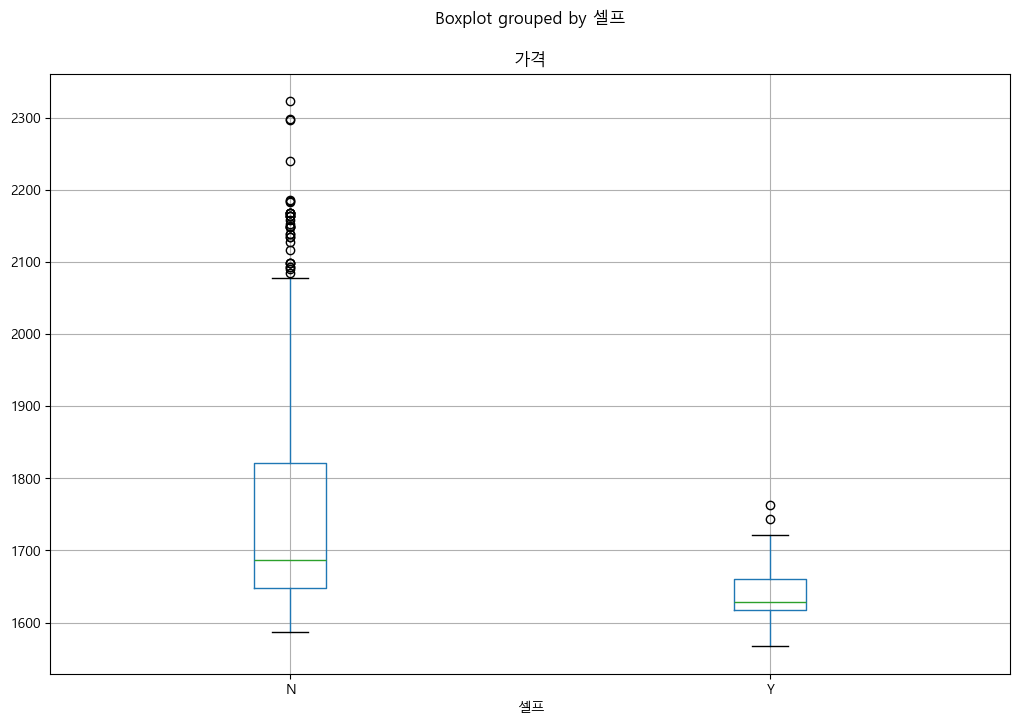

In [26]:
stations.boxplot(column='가격', by='셀프', figsize=(12, 8))
plt.show()

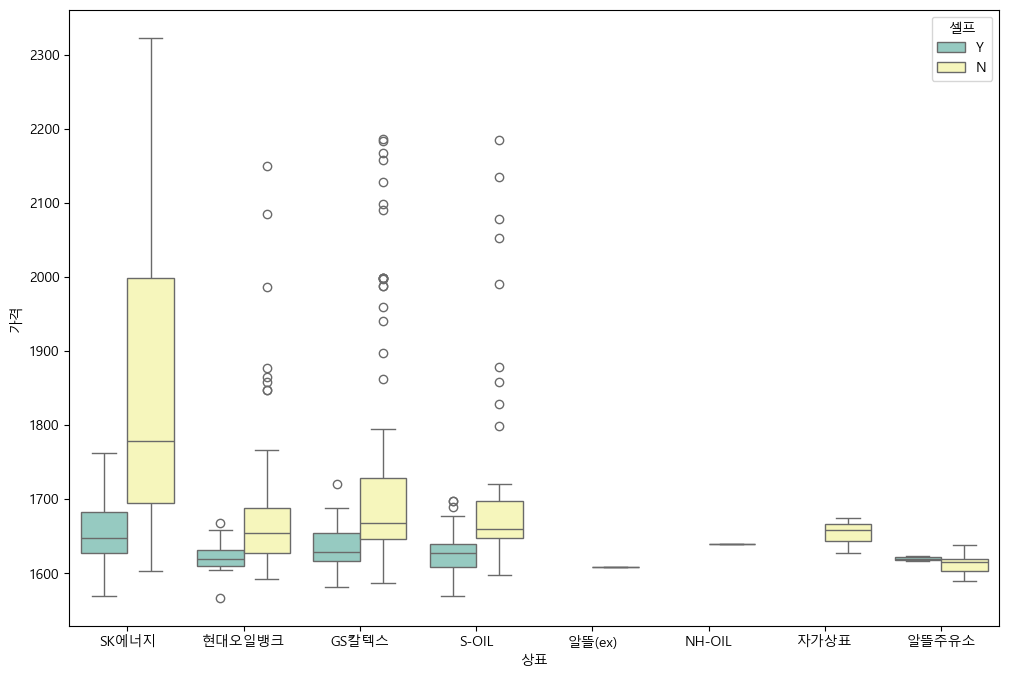

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

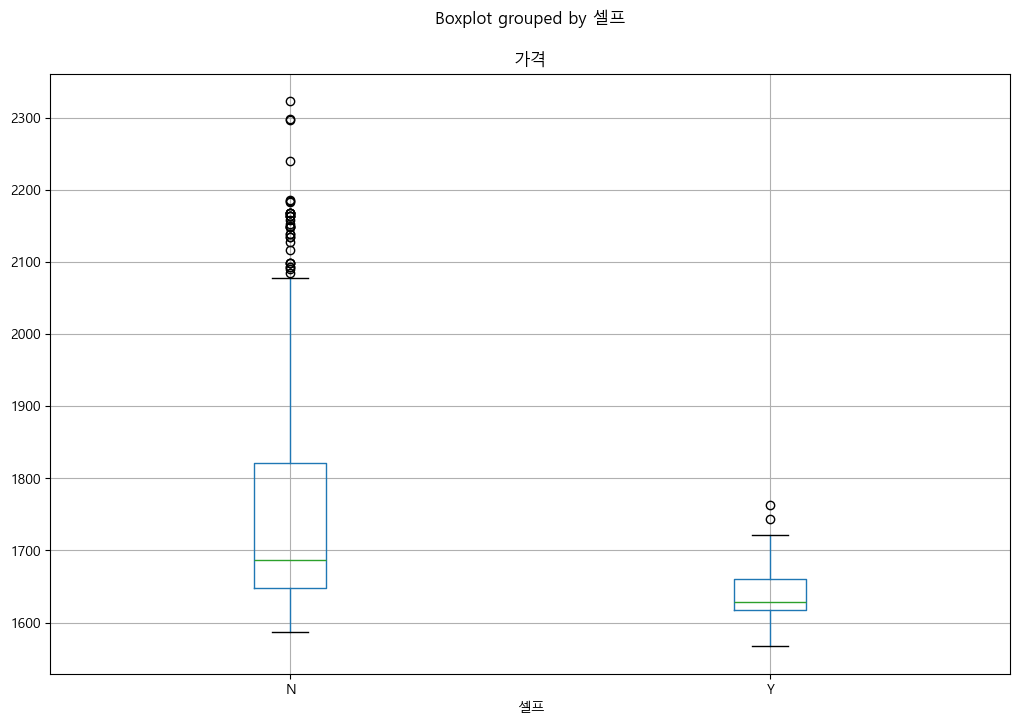

In [32]:
stations.boxplot(column='가격', by='셀프', figsize=(12, 8))
plt.show()

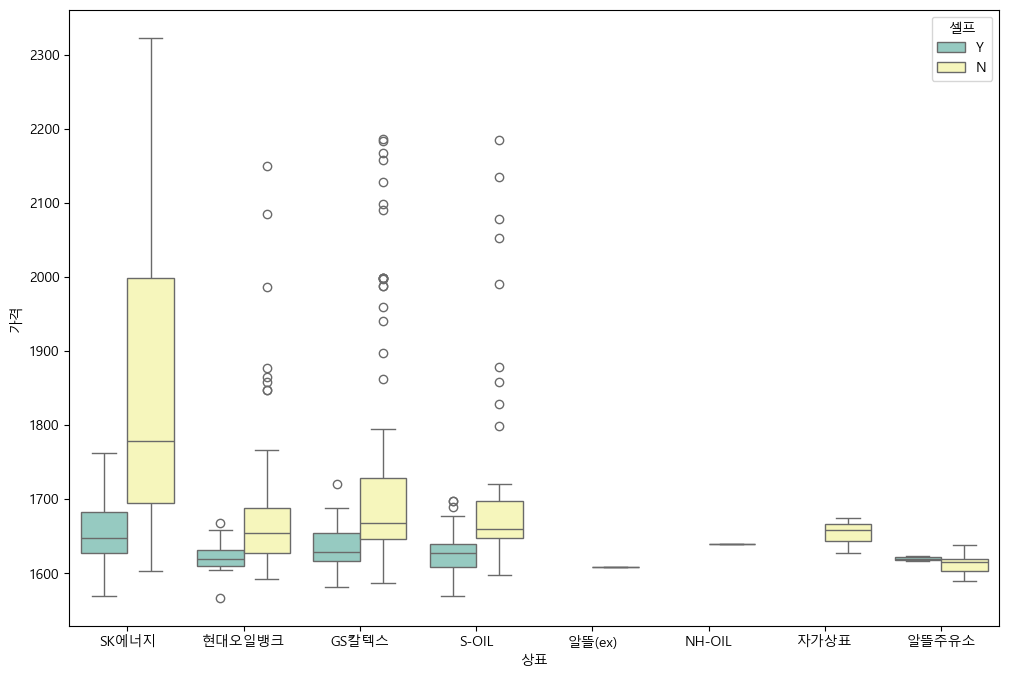

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()


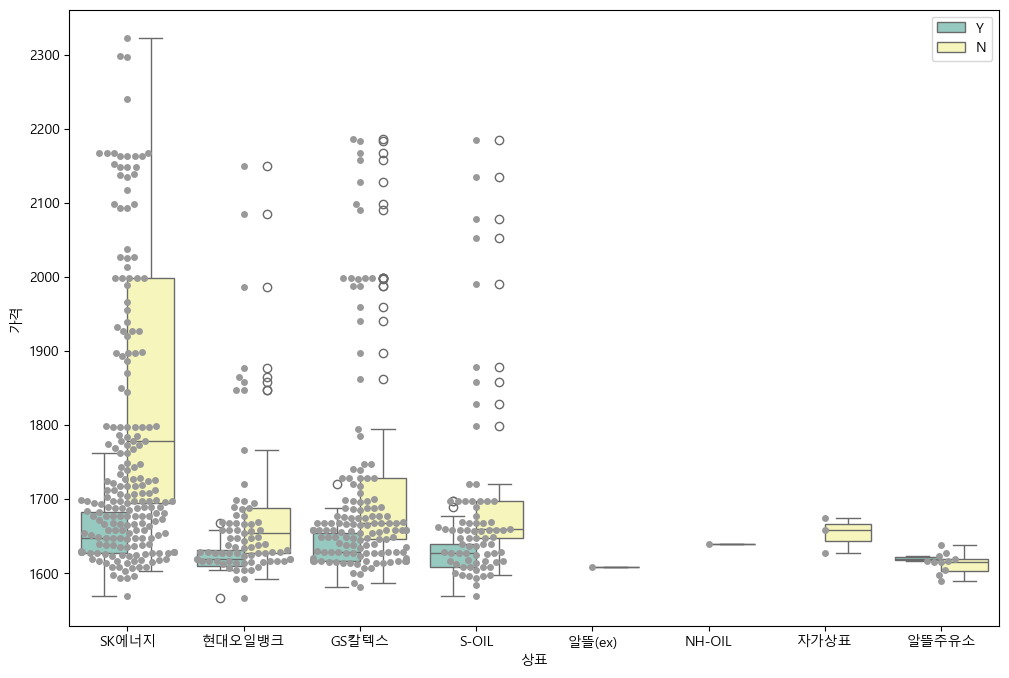

In [36]:
import warnings
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color=".6")
plt.show()

In [37]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
362,서남주유소,서울 중구 통일로 30 (봉래동1가),2323.0,N,SK에너지,중구
361,장충주유소,서울 중구 장충단로 202 (장충동1가),2298.0,N,SK에너지,중구
162,양재주유소,서울 서초구 바우뫼로 178 (양재동),2297.0,N,SK에너지,서초구
41,뉴서울(강남),서울 강남구 언주로 716 (논현동),2240.0,N,SK에너지,강남구
360,약수주유소,서울 중구 다산로 173 (신당동),2186.0,N,GS칼텍스,중구
203,삼선주유소,서울특별시 성북구 창경궁로 324 (삼선동1가),2185.0,N,S-OIL,성북구
359,필동주유소,서울특별시 중구 퇴계로 196 (필동2가),2183.0,N,GS칼텍스,중구
324,한남지점,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구
323,에너비스,서울 용산구 한남대로21길 4 (한남동),2168.0,N,SK에너지,용산구
349,(주)중앙에너비스혜화주유소,서울 종로구 창경궁로35길 1 (혜화동),2168.0,N,SK에너지,종로구


In [38]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
325,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1567.0,Y,현대오일뱅크,은평구
326,타이거주유소,서울 은평구 수색로 188 (증산동),1569.0,Y,SK에너지,은평구
380,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1569.0,Y,S-OIL,강북구
381,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1581.0,Y,GS칼텍스,강북구
42,쌍문주유소,서울특별시 도봉구 도봉로 547 (쌍문동),1584.0,Y,S-OIL,도봉구
382,대성석유(주)신광주유소,서울 강북구 삼양로 484 (수유동),1587.0,N,GS칼텍스,강북구
181,원천주유소,서울특별시 성북구 돌곶이로 142 (장위동),1589.0,N,알뜰주유소,성북구
43,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1592.0,N,현대오일뱅크,도봉구
44,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1592.0,N,현대오일뱅크,도봉구
327,다회주유소,서울 은평구 증산로 441 (신사동),1594.0,Y,S-OIL,은평구


In [40]:
import numpy as np
gu_data=pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1859.500000
강동구,1718.352941
강북구,1613.500000
강서구,1671.441176
관악구,1668.500000
